In [ ]:
import pandas as pd
import numpy as np

In [ ]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.shape

(768, 9)

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
x = diabetes_df.drop('Outcome', axis=1).values
y = diabetes_df['Outcome'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=123)
print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(x_treino, y_treino)
y_pred = clf.predict(x_teste)

print("Accuracy:", metrics.accuracy_score(y_teste, y_pred))

Accuracy: 0.70995670995671


In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO # Use io.StringIO instead of sklearn.externals.six
from IPython.display import Image
import pydotplus

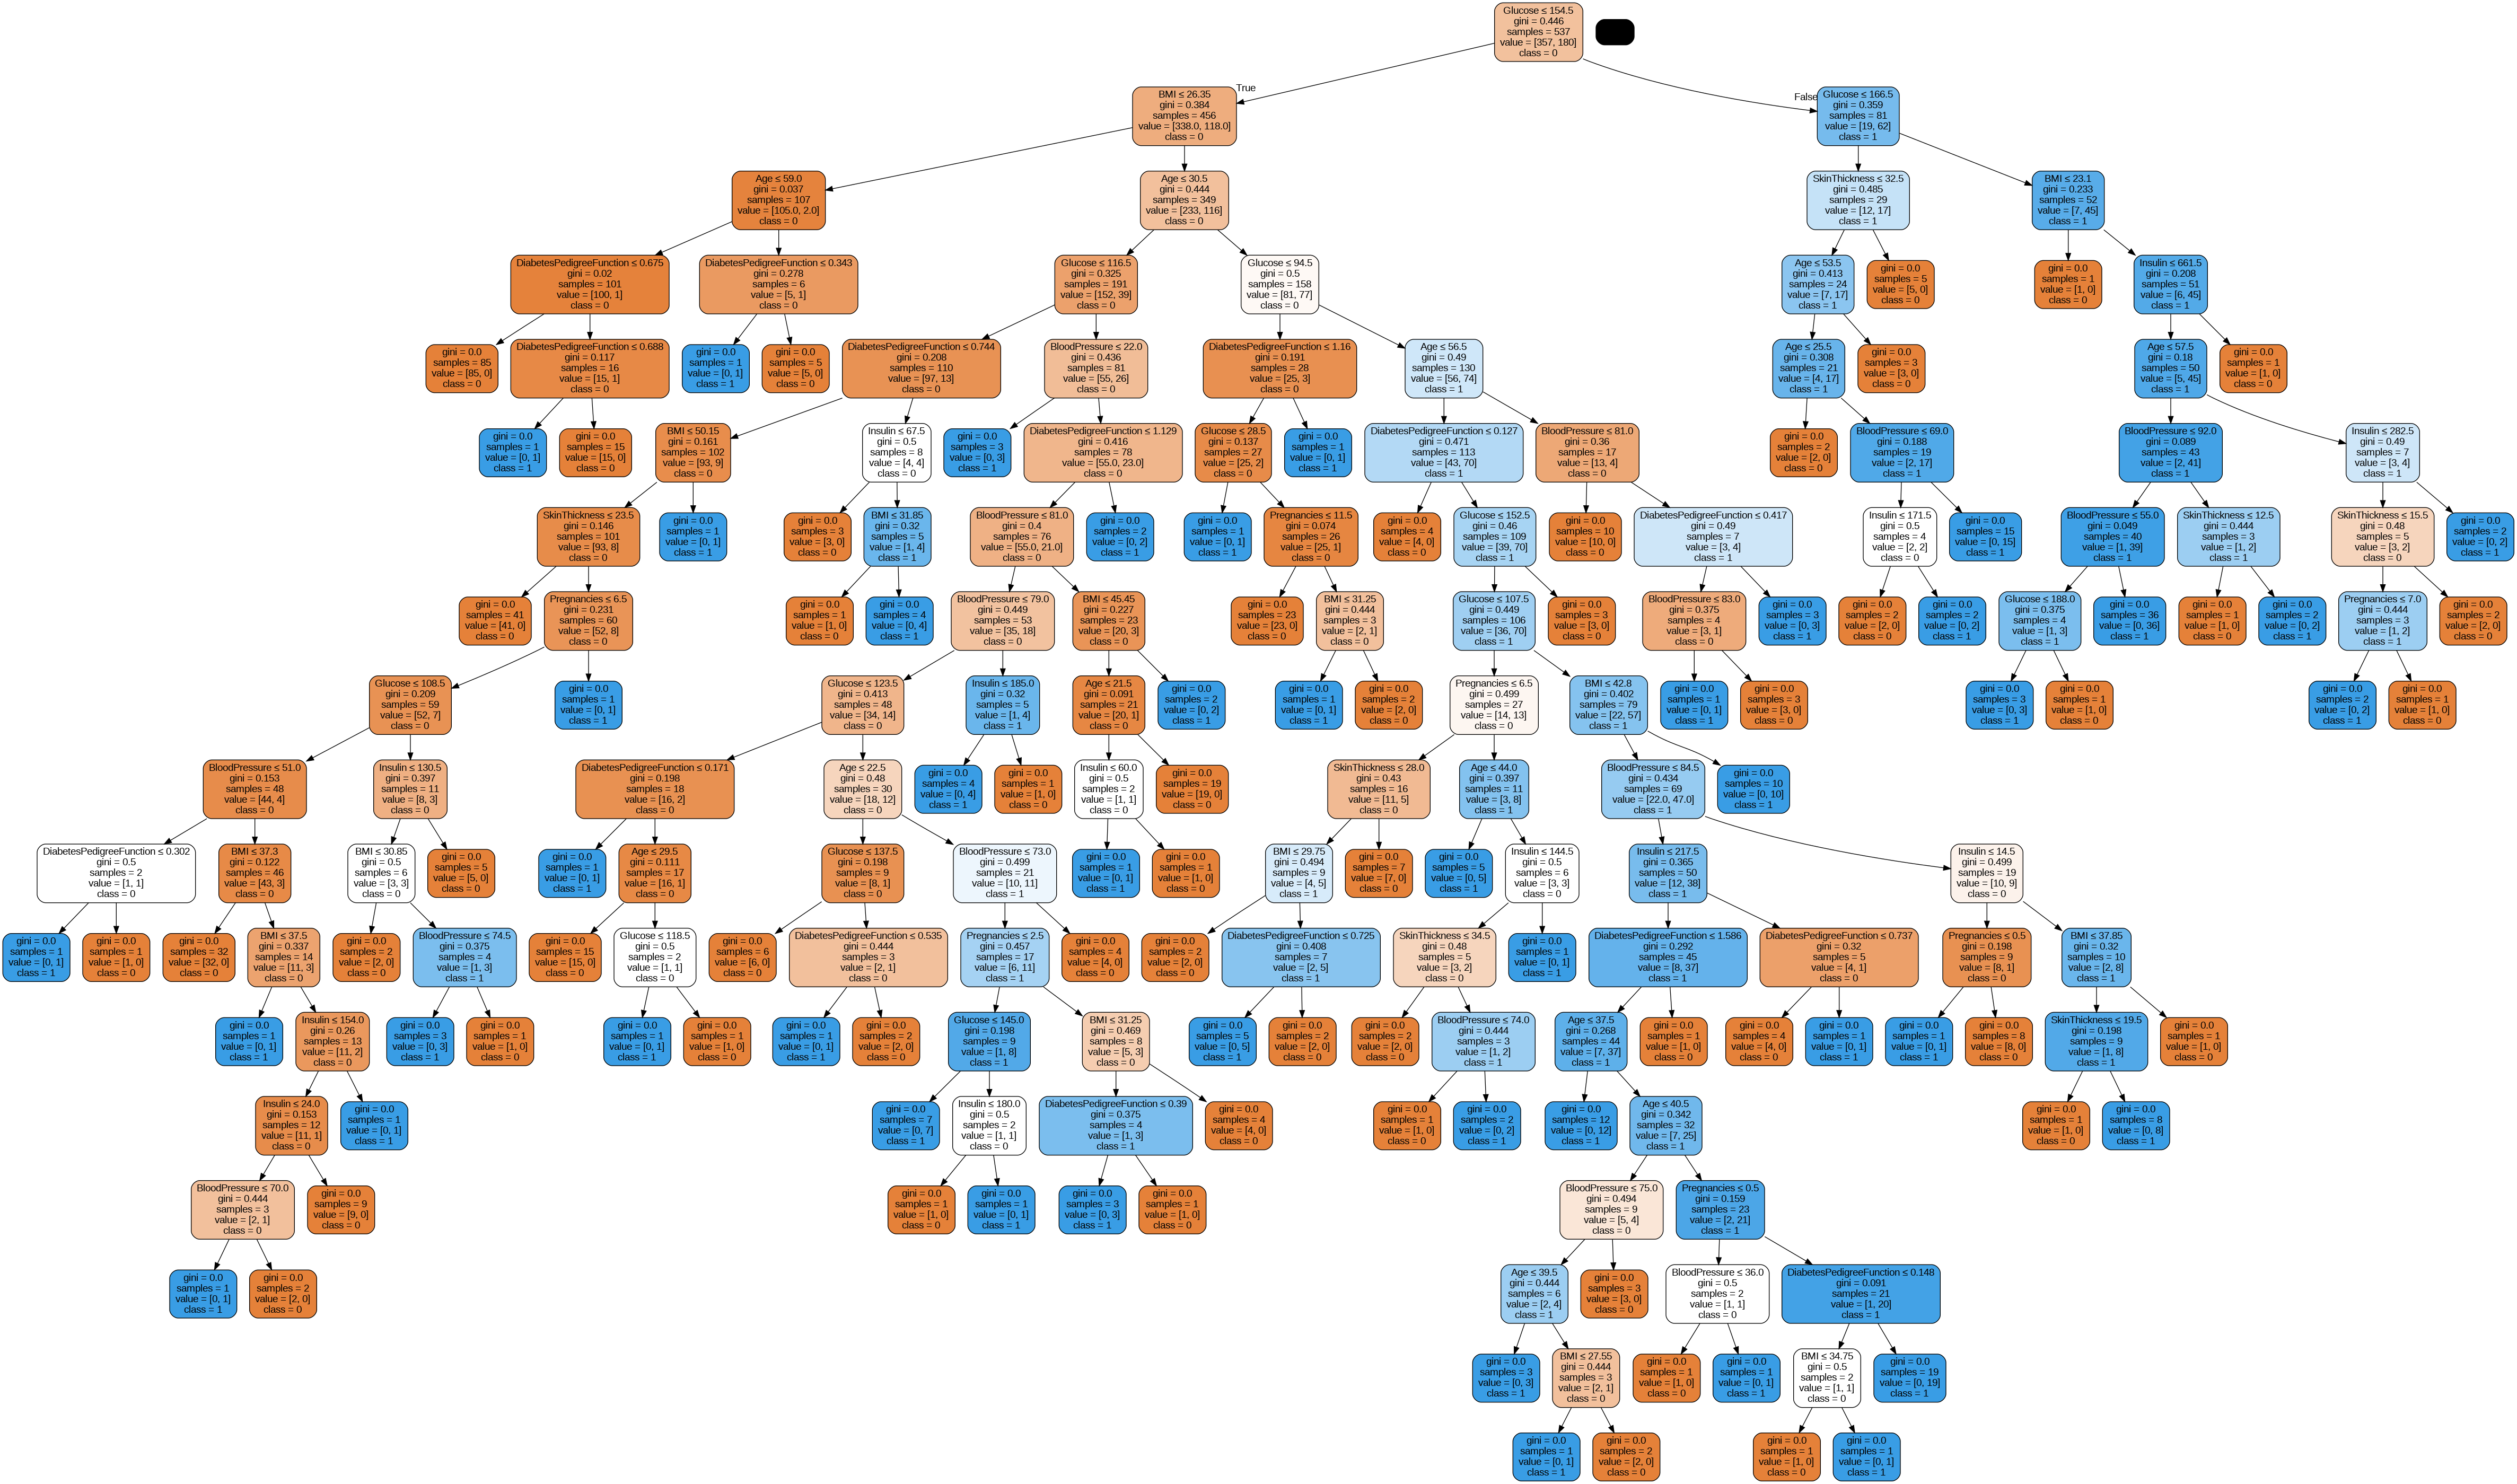

In [ ]:
feature_cols = diabetes_df.drop('Outcome', axis=1).columns.tolist()

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled=True, rounded=True, special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())